In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer , scale, LabelEncoder, StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint  # Réimporte la classe au cas où elle a été écrasée
from dataVisualisation import viewData, viewDataDistribution

Type de data : <class 'dict'>
{
    "ImagesReduce\\frame_0637.jpg": {
        "landmarks": [
            [
                0.5193254351615906,
                0.18619215488433838,
                -0.20120230317115784,
                0.9968469738960266
            ],
            [
                0.5169669389724731,
                0.167844757437706,
                -0.1758834272623062,
                0.9948530793190002
            ],
            [
                0.516369640827179,
                0.16766095161437988,
    
Nombre total d'images : 1000
Répartition des labels :
blocage_gauche: 250 images
blocage_droit: 250 images
coup_de_poing_gauche: 250 images
coup_de_poing_droit: 250 images


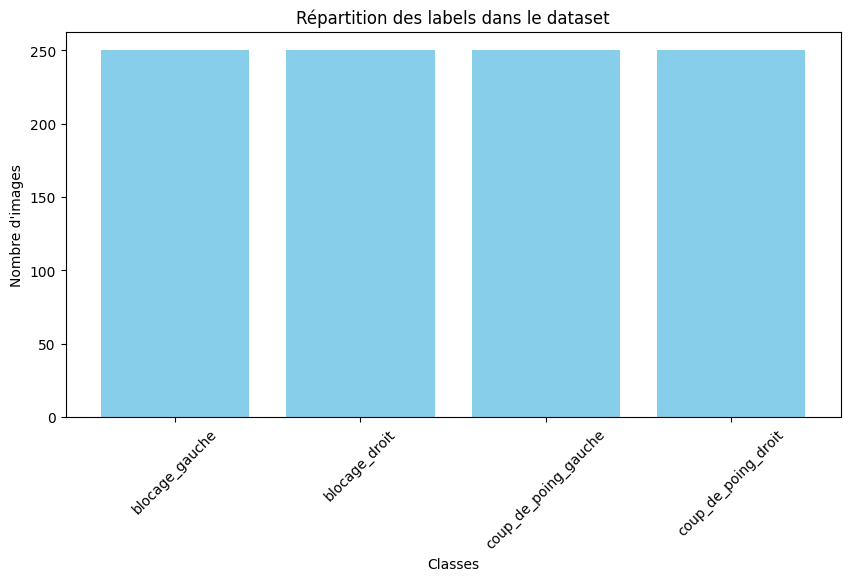

In [2]:
datapath = "dataReduceAugmentedV3"
viewData(datapath)
viewDataDistribution(datapath)

In [3]:
with open(datapath, "r") as f:
    data = json.load(f)

all_features = []
all_labels = []

for image_name, infos in data.items():
    landmarks = infos["landmarks"]
    label = infos["label"]

    all_features.append(np.array(landmarks).flatten())
    all_labels.append(label)



train_features, test_features, train_label, test_label = train_test_split(
    all_features,all_labels,test_size=0.3,random_state=42,stratify=all_labels
)

lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.transform(test_label)

X_train = np.array(train_features)
X_test = np.array(test_features)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [29]:
#Building the MLP model =>
model = Sequential([
    Dense(128, activation='relu',input_shape=(132,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.7),
    Dense(len(lb.classes_), activation='softmax')
])

# Model compilation =>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resume
model.summary()

/Users/djibrildahoub/Documents/cours/2024_2025/S2/IOT/projetAmi/ammiEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,492 (107.39 KB)

 Trainable params: 27,492 (107.39 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
checkpoint_callback = ModelCheckpoint(
    filepath="modeFinalV4.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [31]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2465 - loss: 1.4627 - val_accuracy: 0.3133 - val_loss: 1.3476
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2562 - loss: 1.3793 - val_accuracy: 0.4000 - val_loss: 1.3149
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2664 - loss: 1.3590 - val_accuracy: 0.4367 - val_loss: 1.3025
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: 1.3128 - val_accuracy: 0.4300 - val_loss: 1.2667
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3283 - loss: 1.3253 - val_accuracy: 0.4700 - val_loss: 1.2428
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3620 - loss: 1.2784 - val_accuracy: 0.3500 - val_loss: 1.2845
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.2924 - val_accuracy: 0.4433 - val_loss: 1.2541
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3828 - loss: 1.2779 - val_accuracy: 0.5333 - val_loss:

In [32]:
from tensorflow.keras.models import load_model

# Charger le meilleur modèle sauvegardé
best_model = load_model("modeFinalV4.keras")

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy (best model):", test_accuracy)

Test Accuracy (best model): 0.7900000214576721


Text(0.5, 1.0, 'Évolution de la perte')

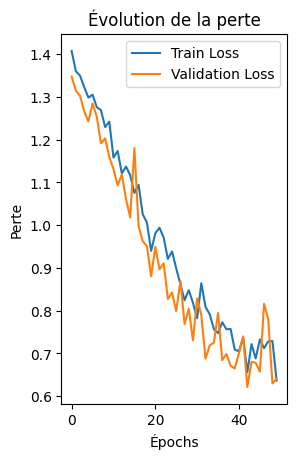

In [33]:
# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Épochs")
plt.ylabel("Perte")
plt.legend()
plt.title("Évolution de la perte")

Text(0.5, 1.0, 'Évolution de la précision')

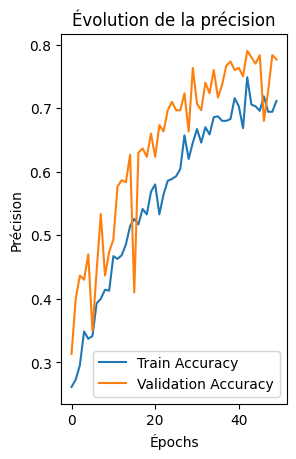

In [34]:

# Courbe de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Épochs")
plt.ylabel("Précision")
plt.legend()
plt.title("Évolution de la précision")

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions du modèle
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calcul des métriques
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.7900
Precision: 0.7965
Recall: 0.7900
F1-score: 0.7889


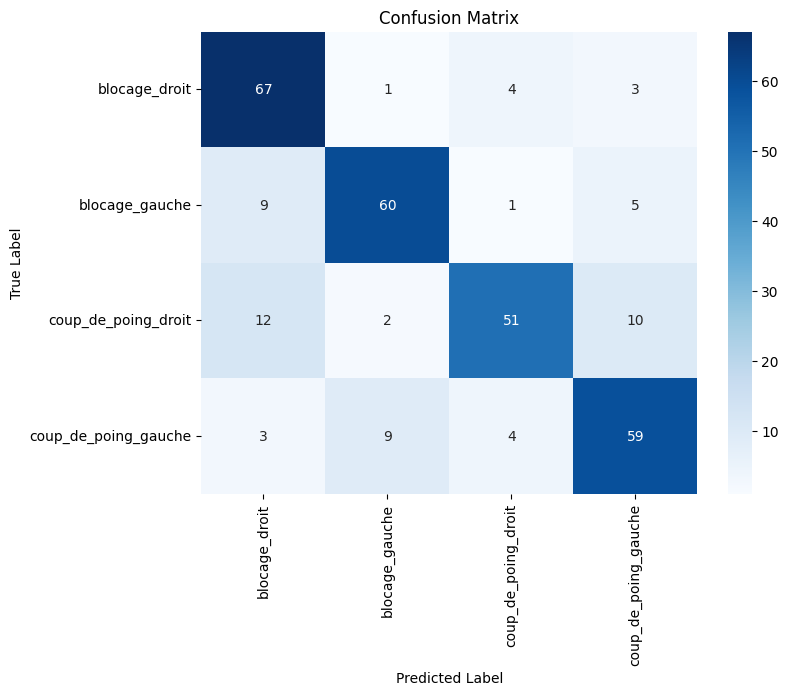

In [36]:
class_names = lb.classes_
# Matrice de confusion
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()